In [1]:
from imblearn.metrics import geometric_mean_score
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,LeakyReLU
from keras import optimizers,regularizers
from keras.losses import binary_crossentropy
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
import time
from datetime import datetime, timedelta
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')


#files=['AAPL','AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
#CPU RUN
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

/home/simone/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled

In [3]:
def buildModel(l,n,d):
    model = Sequential()  
    model.add(Dense(n, input_dim=40,activity_regularizer=regularizers.l2(l))) 
    model.add(BatchNormalization()) 
    model.add(LeakyReLU()) 
    model.add(Dropout(d))
    model.add(Dense(math.floor(n/2), activity_regularizer=regularizers.l2(l))) 
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(Dropout(d))
    model.add(Dense(math.floor(n/4), activity_regularizer=regularizers.l2(l))) 
    model.add(BatchNormalization()) 
    model.add(LeakyReLU()) 
    model.add(Dense(1, activation='sigmoid')) 
    
    model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy', binary_crossentropy])

    return model
def reset_weights(model):
    session=K.get_session()
    for layer in model.layers:
        if(hasattr(layer,'kernel_initializer')):
            layer.kernel.initializer.run(session=session)
            
           


Working on... AAPL
AAPL
15.571701720841297
0.005338458253266777
working on d,u and l 0.5 64 0.05


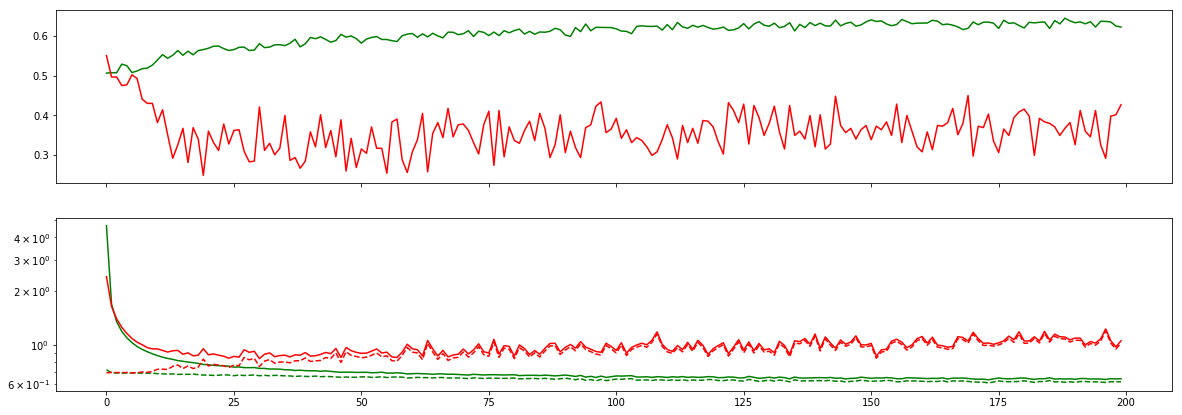

working on d,u and l 0.5 64 0.01


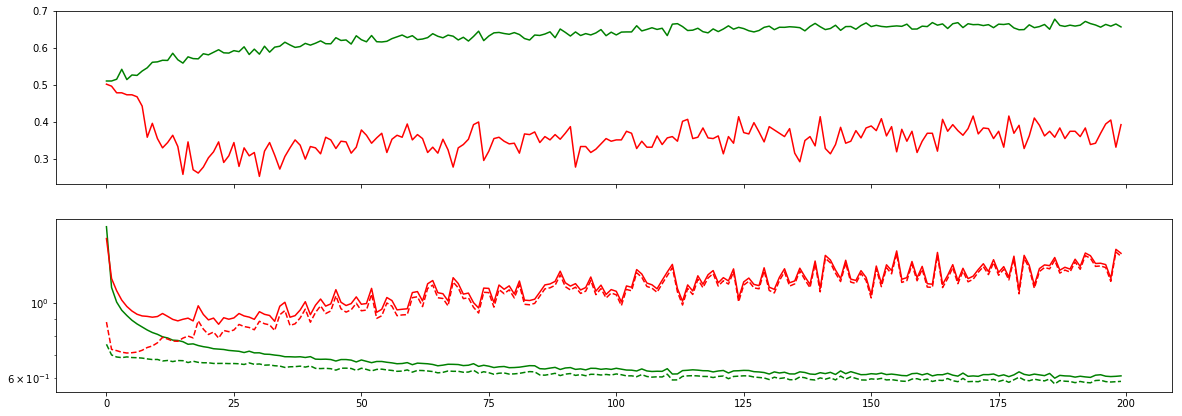

working on d,u and l 0.5 128 0.05


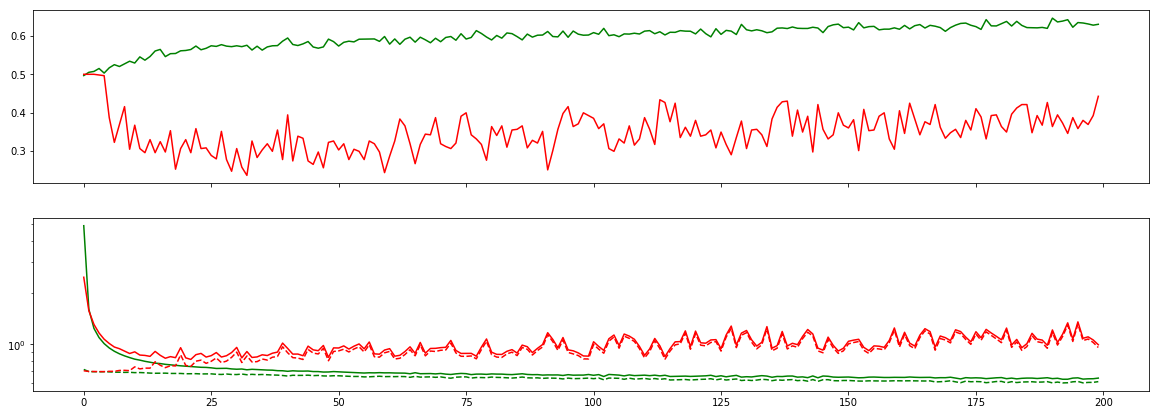

working on d,u and l 0.5 128 0.01


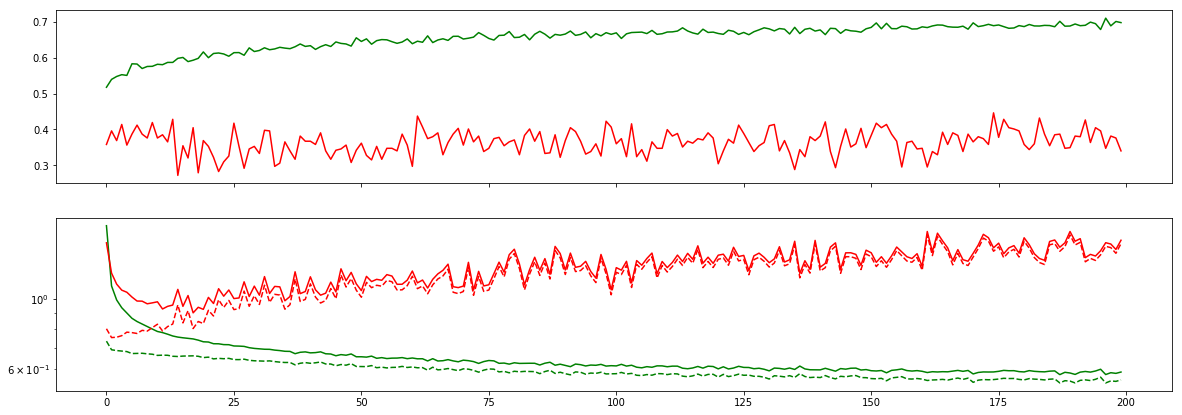

Chart for BEST MODEL FOR:  AAPL  ( 64  ,  0.01 )


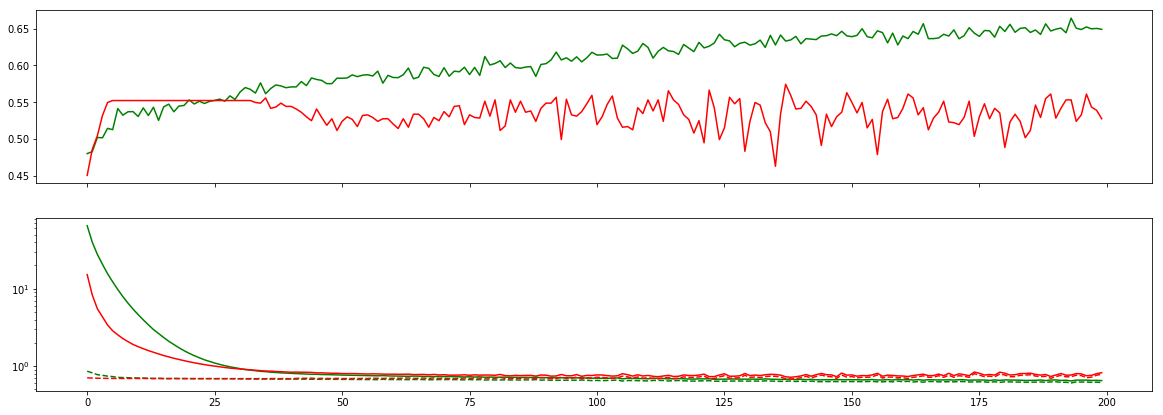

F1,score 0.6715867158671587
G-score: 0.29404498056060296
Accuracy 0.527433628529574
Window: 140
[[ 50 456]
 [ 78 546]]
Vol pos 3.4086986973494144
Vol neg 2.912273405396661
Real Percentage of gain: 63.754067010161606
Percentage of gain: 0.4216198452552513
Total gain: 476.4304251384339
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 41 337]
 [ 24 351]]
753/753 [==============================] - 0s 29us/step
Acc:  0.5205843293888477
Percentile:  1
[[ 1 67]
 [19 65]]
152/152 [==============================] - 0s 38us/step
Acc:  0.4342105265118574
Percentile:  2
[[ 8 52]
 [11 68]]
139/139 [==============================] - 0s 43us/step
Acc:  0.5467625899280576
Percentile:  3
[[ 0  0]
 [17 32]]
49/49 [==============================] - 0s 51us/step
Acc:  0.6530612244897959
Percentile:  4
[[ 0  0]
 [ 7 28]]
35/35 [==============================] - 0s 92us/step
Acc:  0.8000000008514949
000000000000000000000000000000000000000000000000
Working on... AMZN
AMZN
11.150617492631287

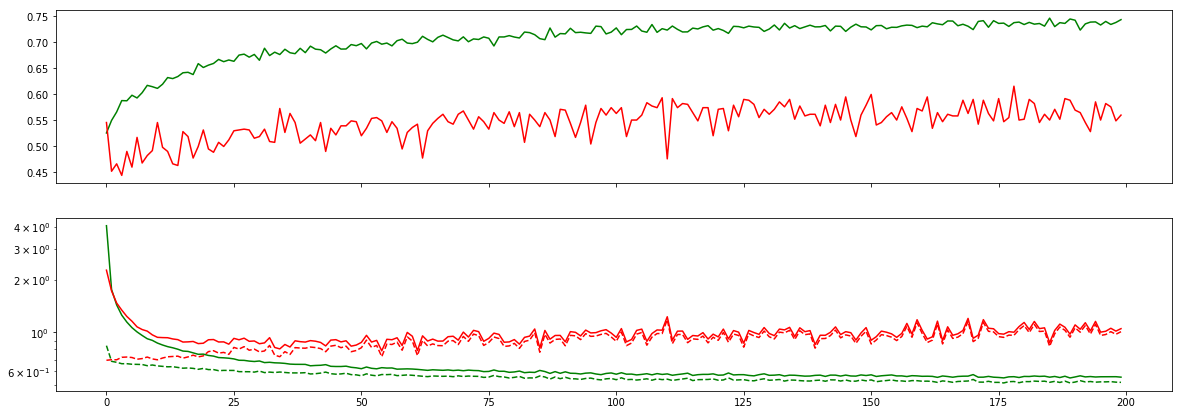

working on d,u and l 0.5 64 0.01


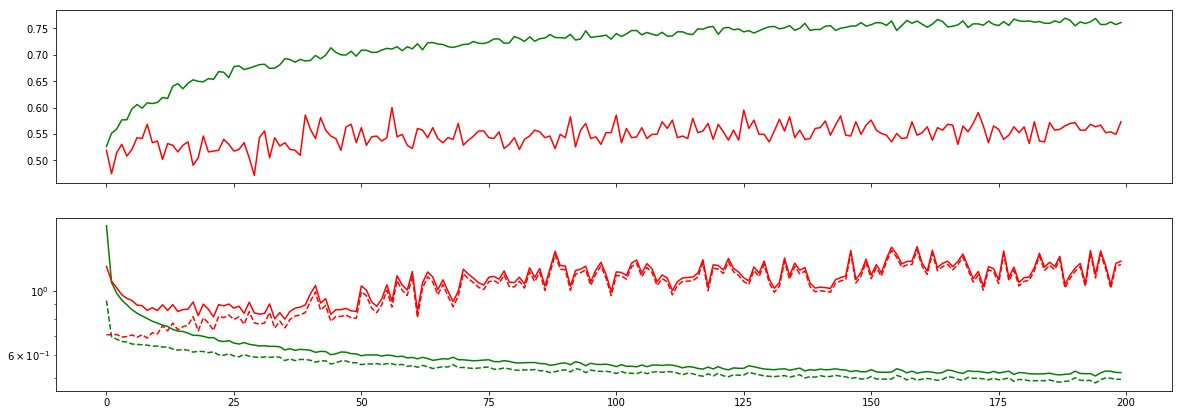

working on d,u and l 0.5 128 0.05


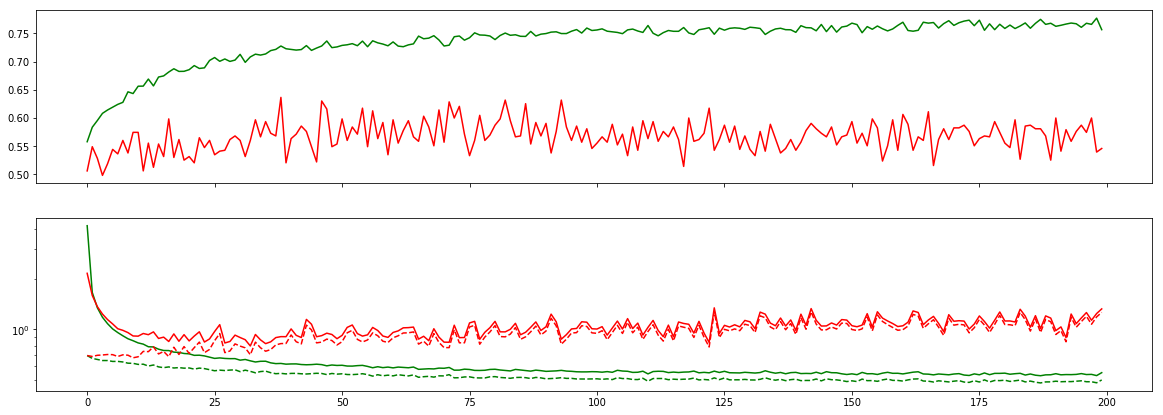

working on d,u and l 0.5 128 0.01


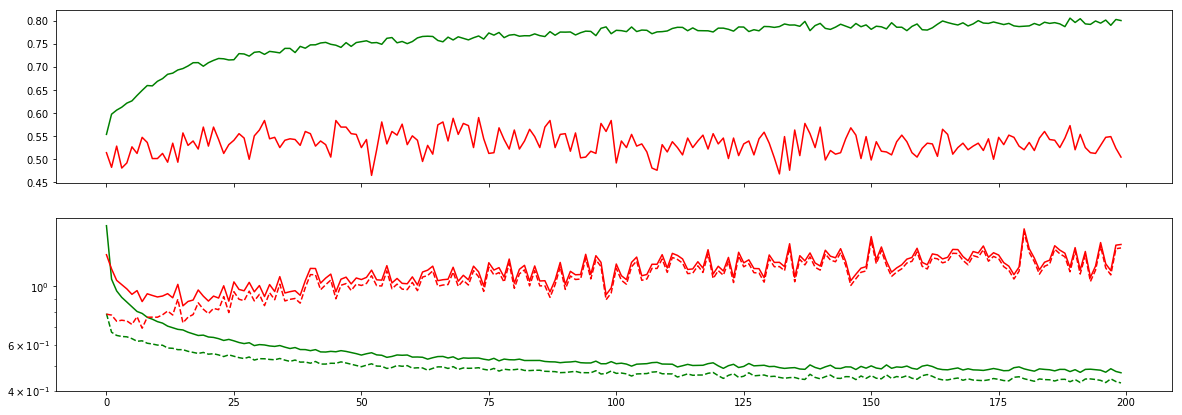

Chart for BEST MODEL FOR:  AMZN  ( 64  ,  0.05 )


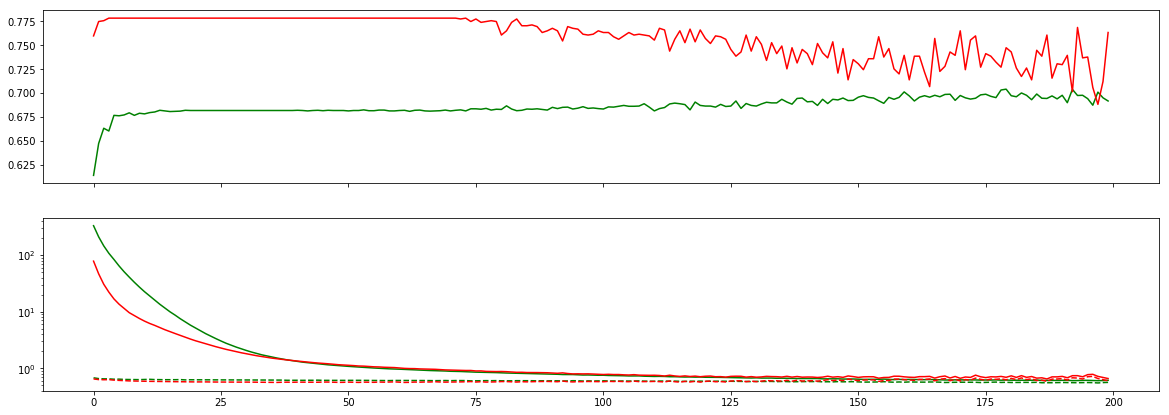

F1,score 0.8655967903711133
G-score: 0.062471305666904405
Accuracy 0.7632508833922261
Window: 140
[[  1 250]
 [ 18 863]]
Vol pos 2.579911686185964
Vol neg 1.663459000504521
Real Percentage of gain: 237.0800285554829
Percentage of gain: 1.5752974246726692
Total gain: 1783.2366847294616
000000000000000000000000000000000000000000000000
Percentile:  0
[[  1 198]
 [ 17 414]]
630/630 [==============================] - 0s 42us/step
Acc:  0.6587301587301587
Percentile:  1
[[  0  36]
 [  1 348]]
385/385 [==============================] - 0s 51us/step
Acc:  0.9038961038961039
Percentile:  2
[[ 0 16]
 [ 0 60]]
76/76 [==============================] - 0s 89us/step
Acc:  0.7894736842105263
Percentile:  3
[[33]]
33/33 [==============================] - 0s 126us/step
Acc:  1.0
Percentile:  4
[[6]]
6/6 [==============================] - 0s 409us/step
Acc:  1.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
GOOGL
9.280622946926826
0.003477111910863453
working on d,u and l 0.5 64 0

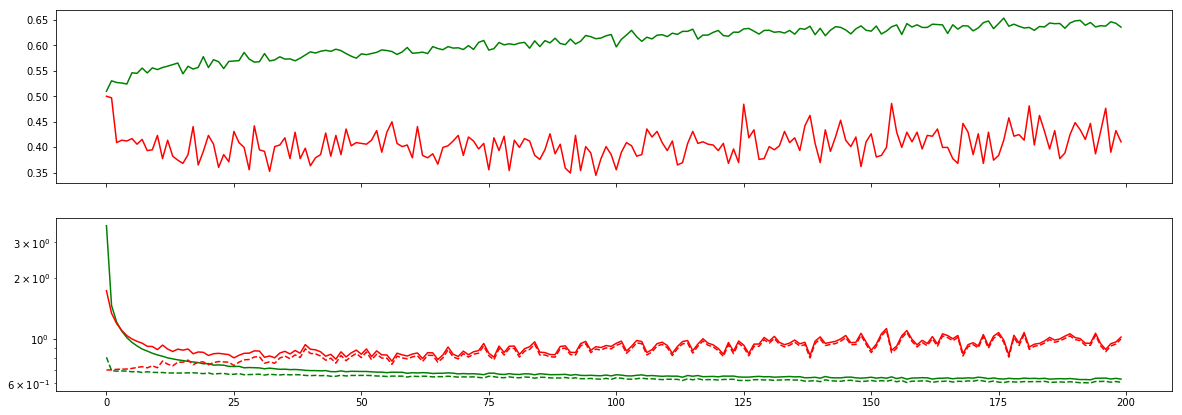

working on d,u and l 0.5 64 0.01


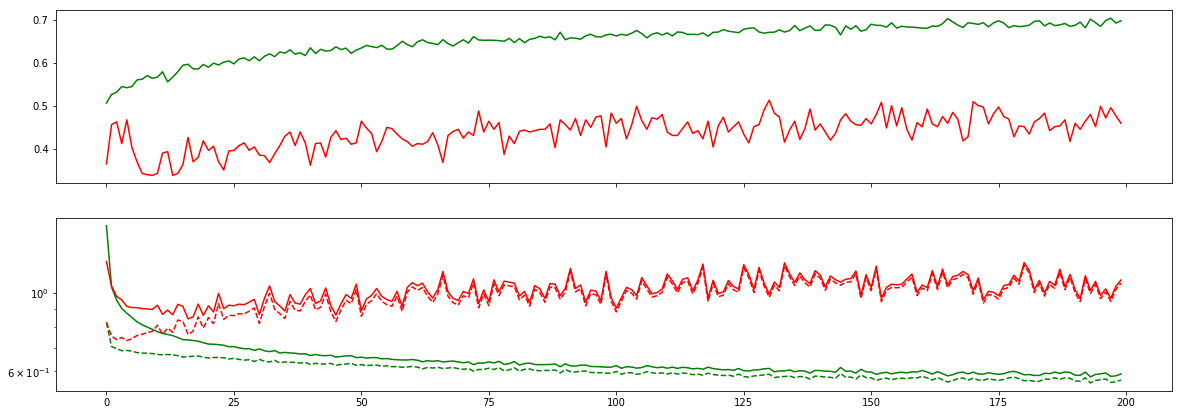

working on d,u and l 0.5 128 0.05


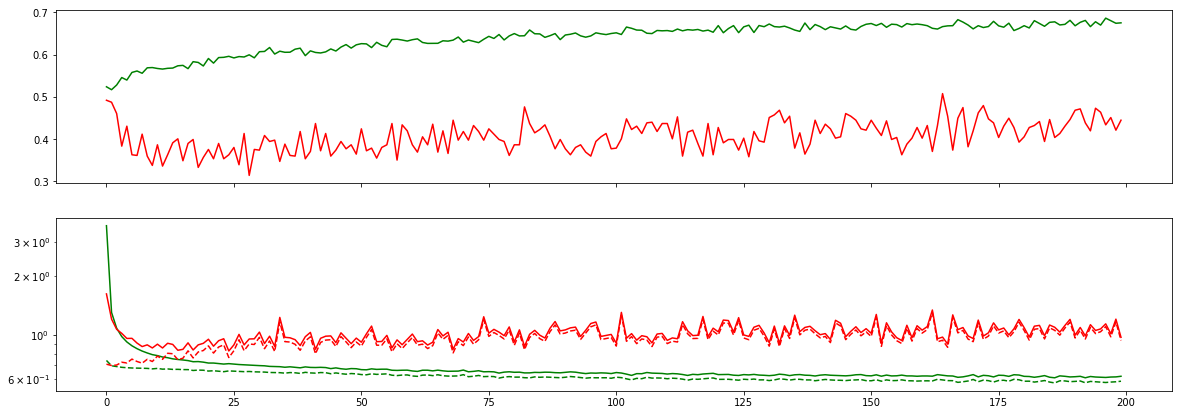

working on d,u and l 0.5 128 0.01


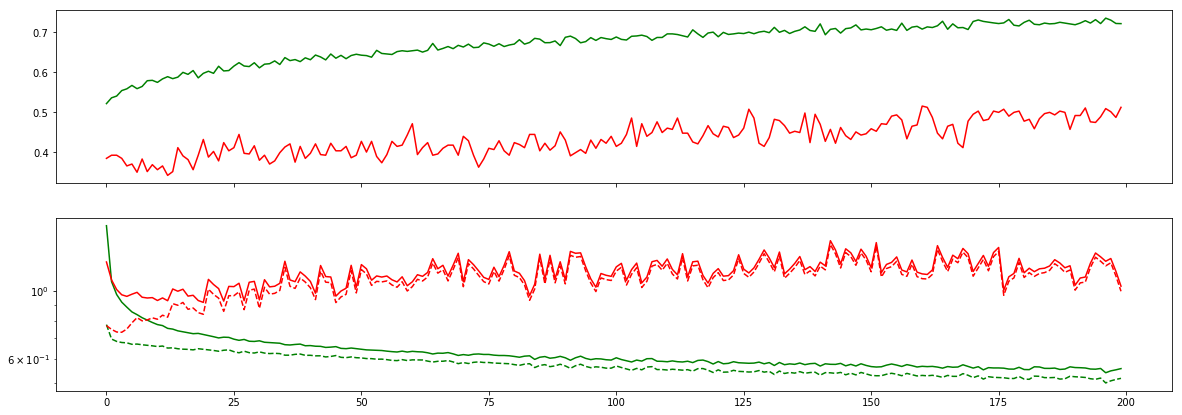

Chart for BEST MODEL FOR:  GOOGL  ( 128  ,  0.01 )


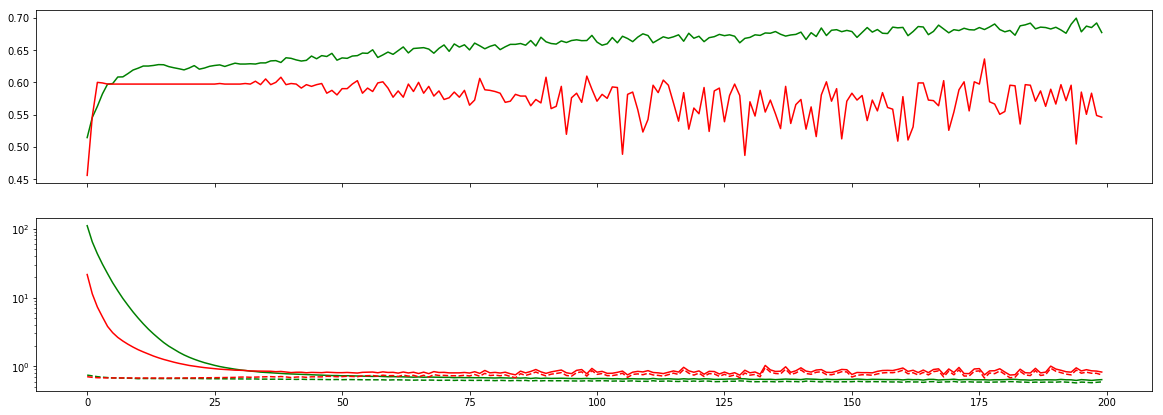

F1,score 0.5995316159250585
G-score: 0.5397417190852707
Accuracy 0.5460177013304381
Window: 140
[[233 222]
 [291 384]]
Vol pos 2.884397779755371
Vol neg 3.0405591761586255
Real Percentage of gain: 50.522139012690424
Percentage of gain: 0.1945721882652113
Total gain: 219.86657273968876
000000000000000000000000000000000000000000000000
Percentile:  0
[[101 131]
 [ 69 110]]
411/411 [==============================] - 0s 60us/step
Acc:  0.5133819958589373
Percentile:  1
[[ 61  50]
 [ 85 167]]
363/363 [==============================] - 0s 95us/step
Acc:  0.6280991737179191
Percentile:  2
[[65 32]
 [62 47]]
206/206 [==============================] - 0s 78us/step
Acc:  0.5436893192309777
Percentile:  3
[[ 6  8]
 [44 43]]
101/101 [==============================] - 0s 152us/step
Acc:  0.4851485154416301
Percentile:  4
[[ 0  0]
 [30 17]]
47/47 [==============================] - 0s 130us/step
Acc:  0.36170212829366644
000000000000000000000000000000000000000000000000
Working on... MSFT
MSFT
5.843279

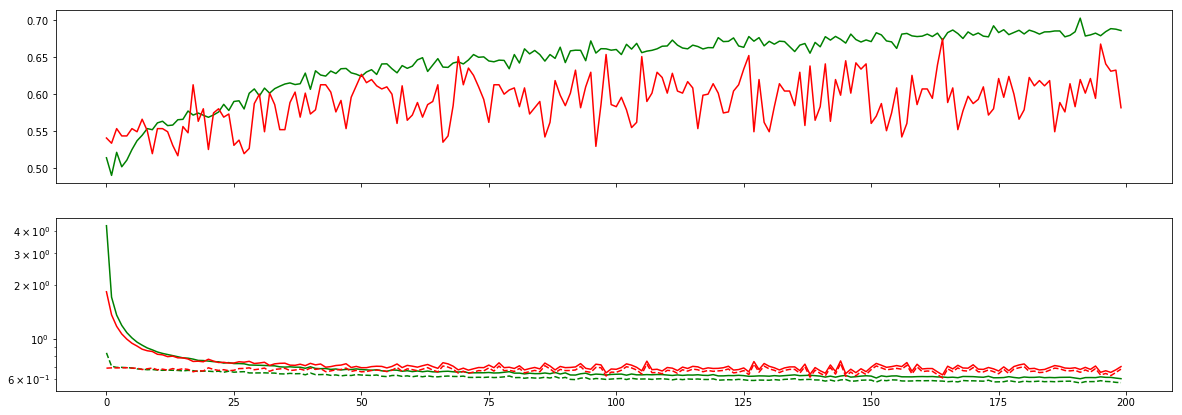

working on d,u and l 0.5 64 0.01


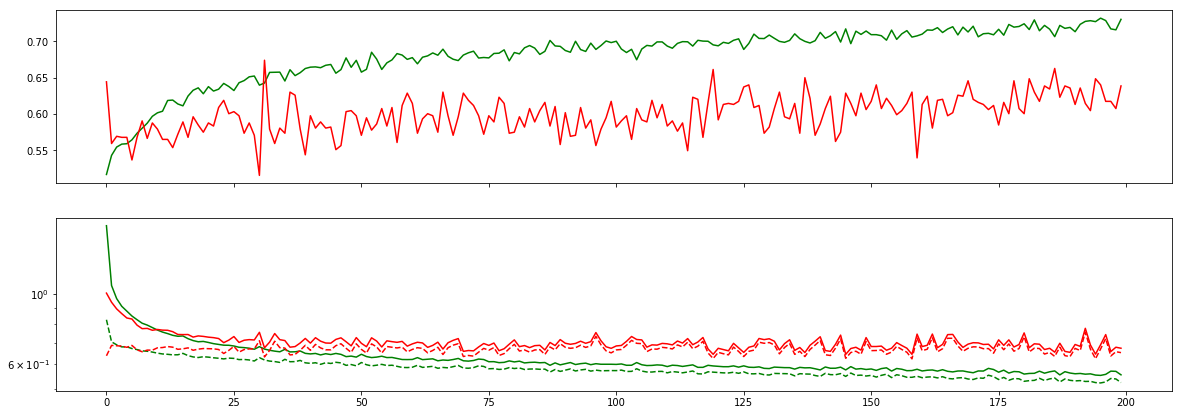

working on d,u and l 0.5 128 0.05


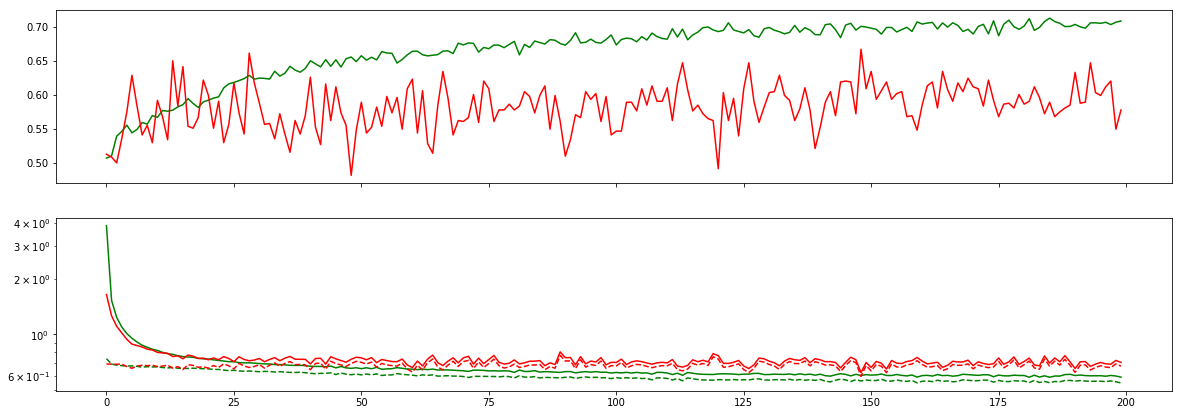

working on d,u and l 0.5 128 0.01


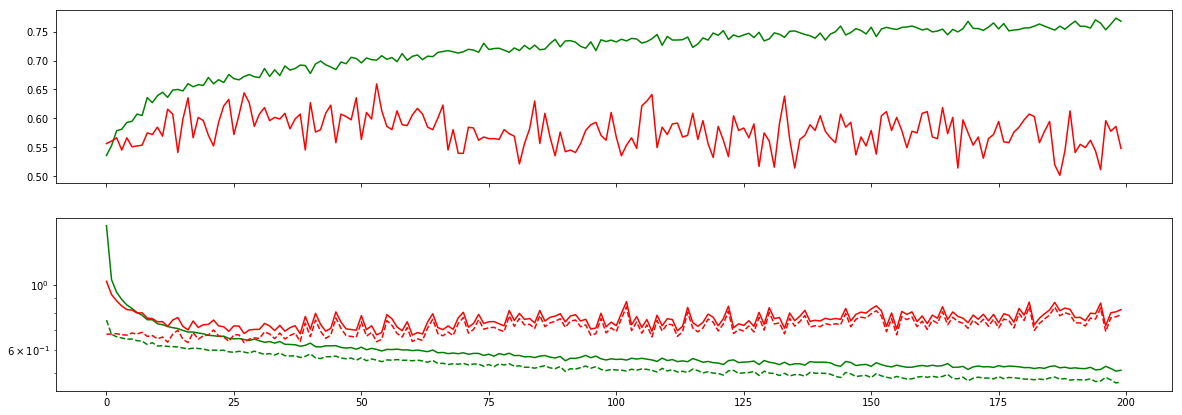

Chart for BEST MODEL FOR:  MSFT  ( 64  ,  0.01 )


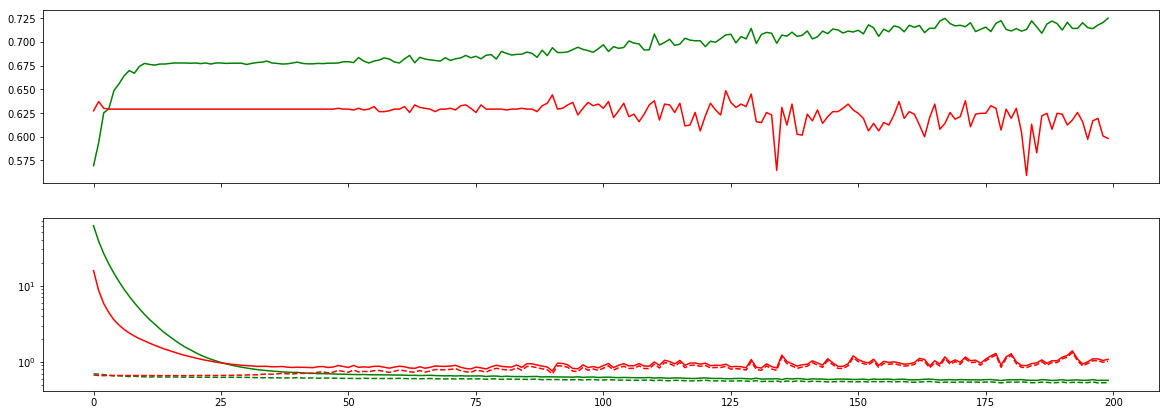

F1,score 0.7420454545454547
G-score: 0.22453223367554573
Accuracy 0.5982300882845853
Window: 140
[[ 23 396]
 [ 58 653]]
Vol pos 1.7051171651211692
Vol neg 1.3815313874012016
Real Percentage of gain: 37.972193853234764
Percentage of gain: 0.4649946493289954
Total gain: 525.4439537417649
000000000000000000000000000000000000000000000000
Percentile:  0
[[  8 284]
 [  3 249]]
544/544 [==============================] - 0s 57us/step
Acc:  0.4724264705882353
Percentile:  1
[[  3  71]
 [ 10 229]]
313/313 [==============================] - 0s 58us/step
Acc:  0.7412140579840627
Percentile:  2
[[  7  16]
 [ 14 126]]
163/163 [==============================] - 0s 82us/step
Acc:  0.8159509202453987
Percentile:  3
[[ 1 19]
 [25 36]]
81/81 [==============================] - 0s 99us/step
Acc:  0.4567901235487726
Percentile:  4
[[ 4  6]
 [ 6 12]]
28/28 [==============================] - 0s 83us/step
Acc:  0.5714285969734192
000000000000000000000000000000000000000000000000
Working on... FB
FB
12.871078806

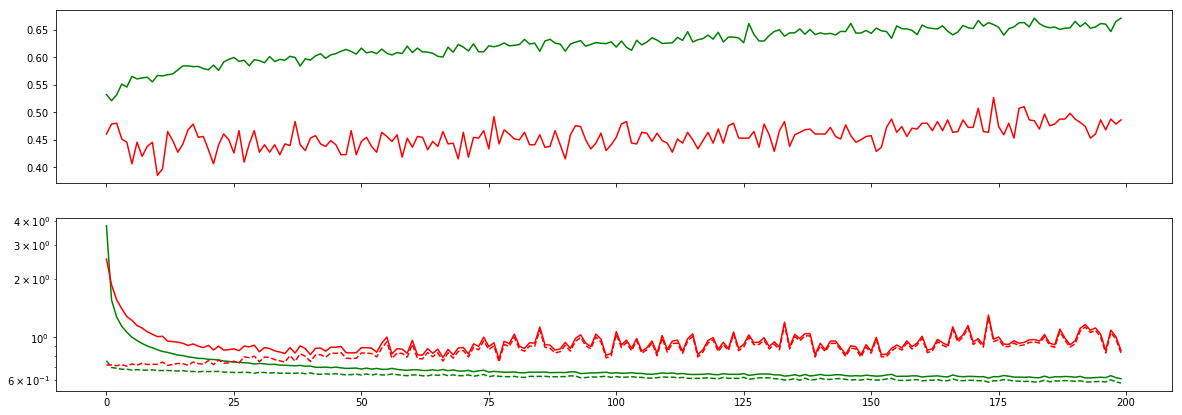

working on d,u and l 0.5 64 0.01


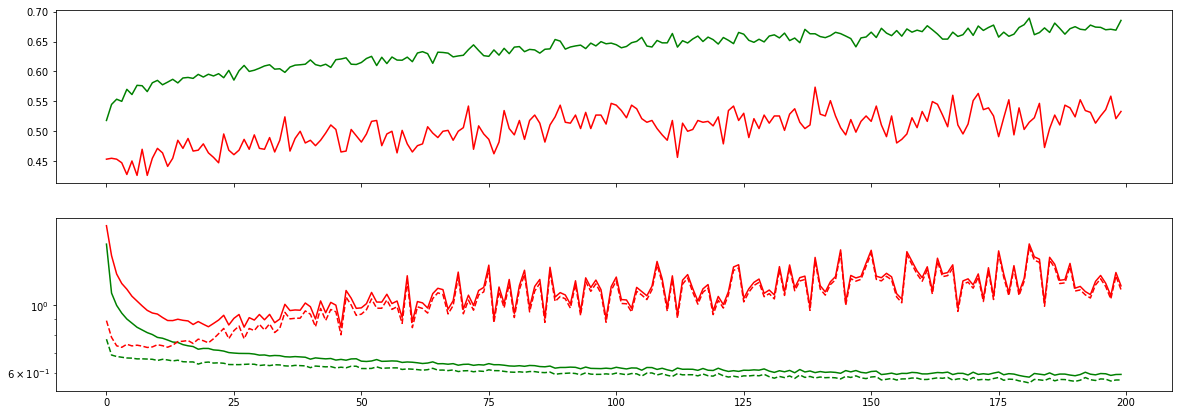

working on d,u and l 0.5 128 0.05


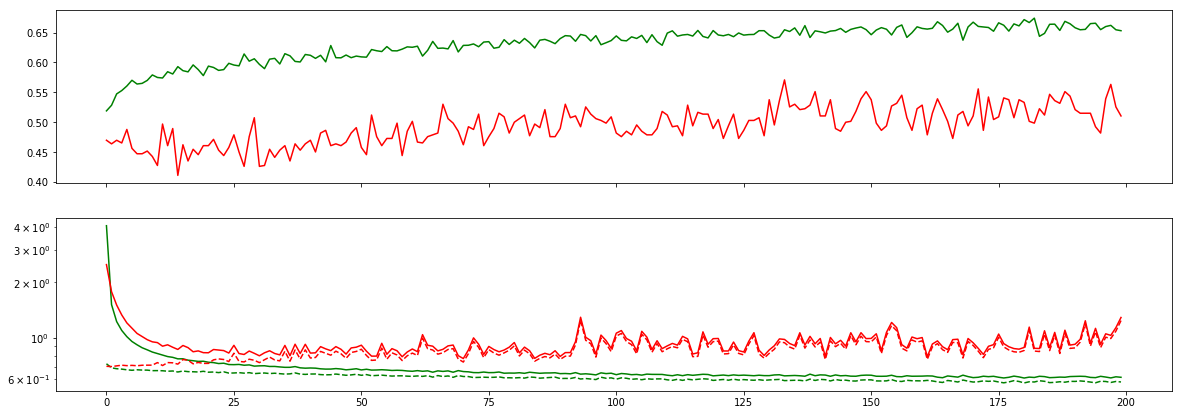

working on d,u and l 0.5 128 0.01


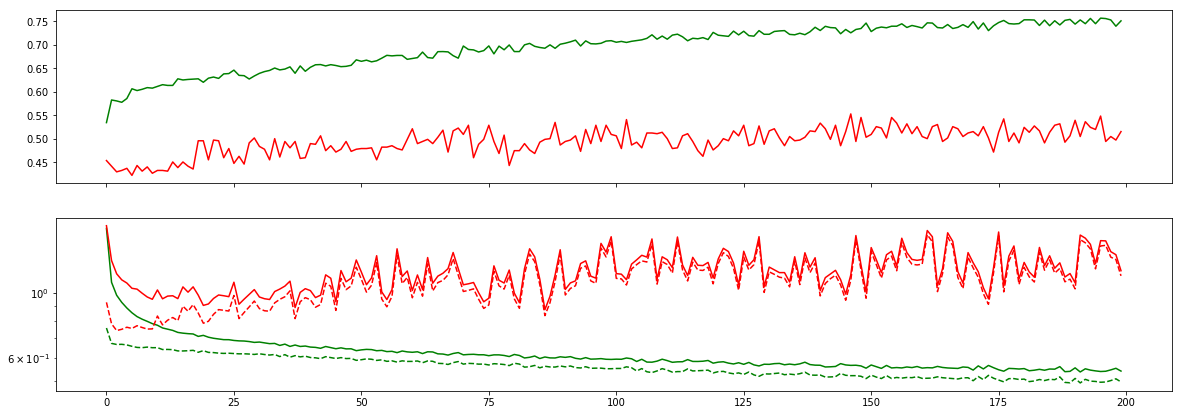

Chart for BEST MODEL FOR:  FB  ( 128  ,  0.01 )


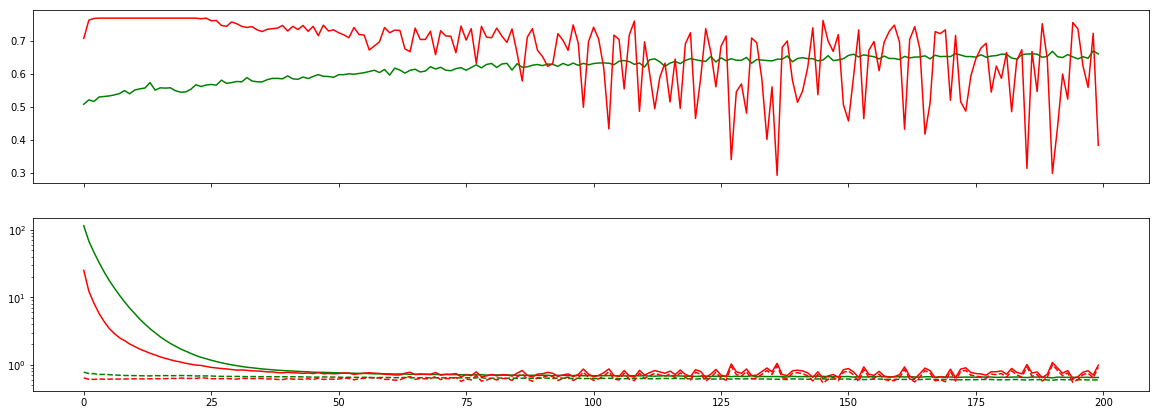

F1,score 0.41047297297297297
G-score: 0.45064240704036396
Accuracy 0.38339222678026125
Window: 140
[[191  72]
 [626 243]]
Vol pos 2.860710284814131
Vol neg 3.212570108838957
Real Percentage of gain: -88.45340095716352
Percentage of gain: -0.8841216186928083
Total gain: -1000.8256723602591
000000000000000000000000000000000000000000000000
Percentile:  0
[[145  67]
 [223  87]]
522/522 [==============================] - 0s 99us/step
Acc:  0.4444444445586296
Percentile:  1
[[ 32   5]
 [306 125]]
468/468 [==============================] - 0s 112us/step
Acc:  0.3354700859795269
Percentile:  2
[[13  0]
 [78 14]]
105/105 [==============================] - 0s 141us/step
Acc:  0.2571428572138151
Percentile:  3
[[ 0  0]
 [10  4]]
14/14 [==============================] - 0s 304us/step
Acc:  0.2857142984867096
Percentile:  4
[[ 0  0]
 [ 8 13]]
21/21 [==============================] - 0s 207us/step
Acc:  0.6190476417541504
000000000000000000000000000000000000000000000000
Working on... INTC
INTC
6.746

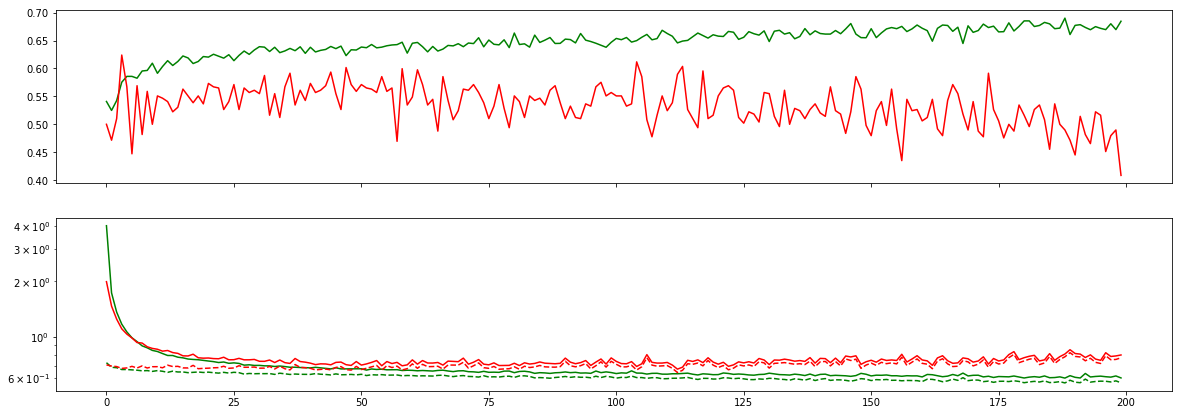

working on d,u and l 0.5 64 0.01


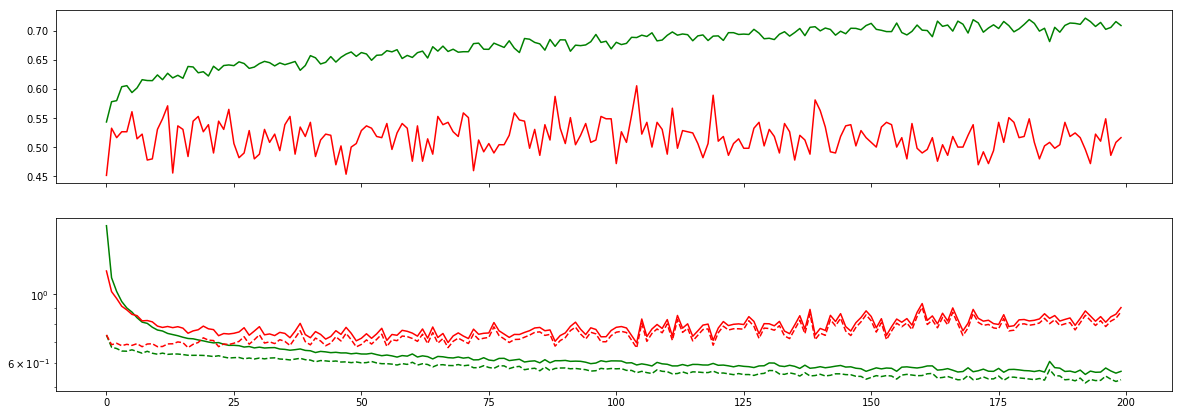

working on d,u and l 0.5 128 0.05


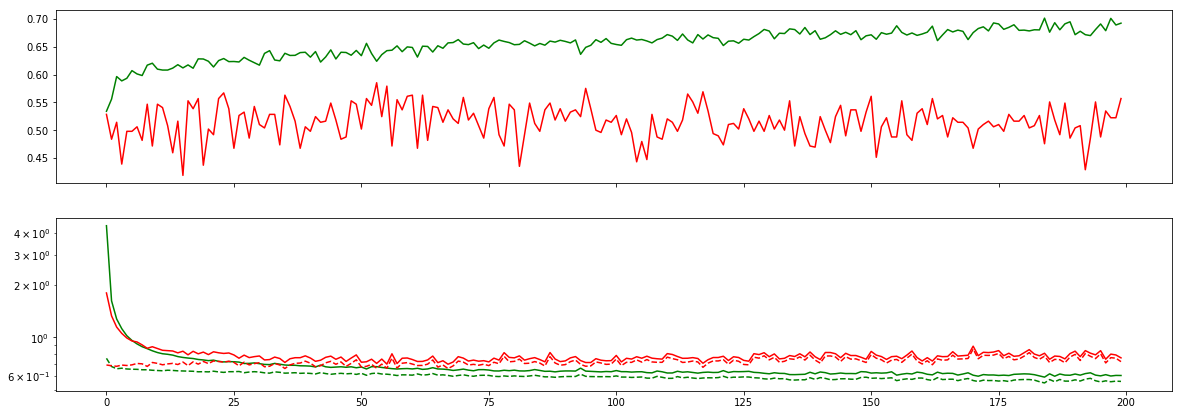

working on d,u and l 0.5 128 0.01


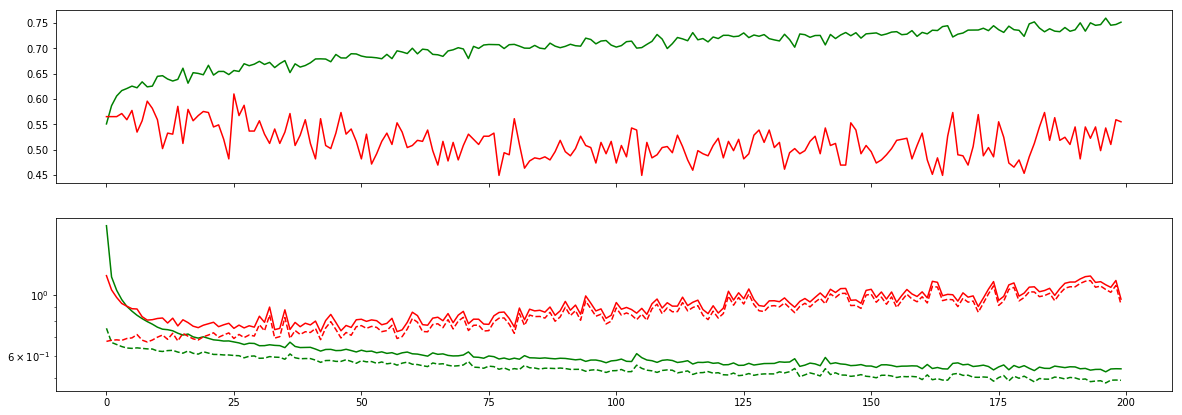

Chart for BEST MODEL FOR:  INTC  ( 128  ,  0.05 )


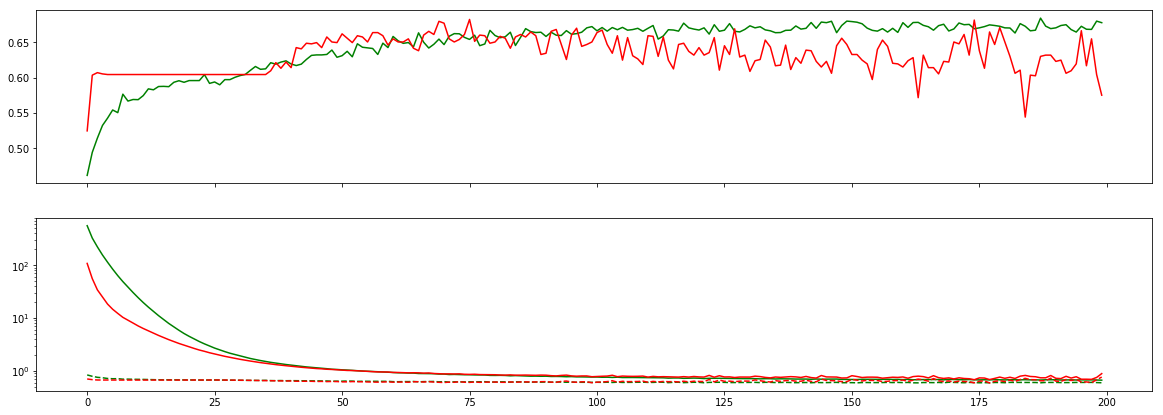

F1,score 0.5175526579739217
G-score: 0.5752267450933385
Accuracy 0.5750883396438491
Window: 140
[[393  55]
 [426 258]]
Vol pos 2.5999884421257105
Vol neg 1.9654774959452173
Real Percentage of gain: 69.09360356597622
Percentage of gain: 0.6600687281574099
Total gain: 747.197800274188
000000000000000000000000000000000000000000000000
Percentile:  0
[[103  13]
 [170  68]]
354/354 [==============================] - 0s 116us/step
Acc:  0.4830508474576271
Percentile:  1
[[ 89  25]
 [135  93]]
342/342 [==============================] - 0s 133us/step
Acc:  0.5321637444328844
Percentile:  2
[[110  17]
 [ 88  63]]
278/278 [==============================] - 0s 163us/step
Acc:  0.6223021569869501
Percentile:  3
[[63  0]
 [22 29]]
114/114 [==============================] - 0s 131us/step
Acc:  0.8070175438596491
Percentile:  4
[[28  0]
 [ 9  5]]
42/42 [==============================] - 0s 212us/step
Acc:  0.7857142857142857
000000000000000000000000000000000000000000000000
Working on... CSCO
CSCO
6.45

In [ ]:

accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]


files=['AAPL','AMZN','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
  

for file in files:
    print('Working on...',file)
    
#     sentimentVector =  pd.read_csv('/home/simone/Desktop/NLFF/intrinioDataset/SentimentFul/'+file+'.csv')
#     price= pd.read_csv('/home/simone/Desktop/NLFF/TechnicalDataset/indexes'+file+'.csv')
    sentimentVector =  pd.read_csv('/home/simone/Desktop/NLFF/intrinioDatasetUpdated/Sentiment/'+file+'.csv')
    price= pd.read_csv('/home/simone/Desktop/NLFF/TechnicalDatasetUpdated/'+file+'.csv')
    
    #alignment of data
    maxdata=max(sentimentVector['initTime'])
    mindata=min(sentimentVector['initTime'])
    price['Unnamed: 0'] = [datetime.strptime(row, '%Y-%m-%d %H:%M:%S') for row in price['Unnamed: 0']]
    price['Unnamed: 0'] = [row-timedelta(hours=8) for row in price['Unnamed: 0']]
    price=price[price['Unnamed: 0']>=mindata]
    price=price[price['Unnamed: 0']<=maxdata]
    print(file)
   
    assert len(price) == len(sentimentVector)
    
    sentimentVector=sentimentVector.drop(['Unnamed: 0', 'initTime' ], axis=1)
    meanvector = pd.concat([sentimentVector, sentimentVector.rolling(5).mean()],axis=1) #Rolling considering past data
    meanvector = pd.concat([meanvector, sentimentVector.rolling(10).mean()],axis=1)
    meanvector = pd.concat([meanvector, sentimentVector.rolling(15).mean()],axis=1)
    meanvector = pd.concat([meanvector, sentimentVector.rolling(20).mean()],axis=1)
    price=price.drop(['Unnamed: 0'],axis=1)
    
   
    senttemp=np.nan_to_num(np.asarray(meanvector, dtype=float))
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        yvolatility=[]
        yprice=[]

        
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            # measures % of change respect to the value of the stock
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(senttemp[i])
        
        y=np.array(y)
        x=np.array(x)
        scaler = MinMaxScaler() 
        scaler.fit(x)
        MinMaxScaler(copy=True, feature_range=(0, 1))
        x=scaler.transform(x)
        yvolatility=np.array(yvolatility)
       
        permindex=range(0,len(x))
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    


        lspace=[0.05,0.01]
        dropspace=[0.5]
        uspace=[64,128]
        maxacc=0
        cvacc=0
        maxu=0
        maxl=0
        totu=0
        for d in dropspace:
            for u in uspace:
                #print()
                for l in lspace:
                    
                   
                    print('=========================================================')
                    print('working on d,u and l',d,u,l)
                    
                    cvacclist=[]
                    #faccio cross validation
                    #start with 40% as train and 10% for validation and then i move in percentege
                    # 0-40 40-50
                    # 0-50 50-60
                    # 0-60 60-70 
                    #etc test set is completely external i do in some way error extimation changin the ticker
                    trainpoint=math.floor(len(x_tv)*0.40)
                    dimval=math.floor(trainpoint*0.25)
                    endval=trainpoint+dimval
                    model=buildModel(l,u,d)
                    for i in range(0,6):
                        #print('-----')
                        x_train=x_tv[0:trainpoint]
                        y_train=y_tv[0:trainpoint]
                        x_val=x_tv[trainpoint:endval]
                        y_val=y_tv[trainpoint:endval]

                        trainpoint=trainpoint+dimval
                        endval=endval+dimval
                        
                        x_train,y_train=smote(x_train,y_train)
                        if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                            x_val,y_val=smote(x_val,y_val)
                        else:
                            totu=totu+1

                        history=model.fit(x_train, y_train, epochs = 200,batch_size =128, verbose=0, validation_data=(x_val, y_val),
                                          shuffle=True)
                        prediction=model.predict(x_val, batch_size=128, verbose=0)
                        for el in range(0,len(prediction)):
                            if(prediction[el]>0.5):
                                prediction[el]=1
                            else:
                                prediction[el]=0

                        if(i==5):
                            f, axarr = plt.subplots(2, sharex=True)
                            f.set_figheight(7)
                            f.set_figwidth(20)
                            axarr[0].plot(history.history['acc'],'g', label='accuracy_train')
                            axarr[0].plot(history.history['val_acc'],'r', label='accuracy_val')
                            axarr[1].semilogy(history.history['loss'],'g',label='loss_train')
                            axarr[1].semilogy(history.history['val_loss'],'r',label='loss_val')                       
                            axarr[1].semilogy(history.history['binary_crossentropy'],'g--',label='cross_entropy') 
                            axarr[1].semilogy(history.history['val_binary_crossentropy'],'r--',label='cross_entropy_val')
                            plt.show()

                        #i take the last one
                        #maxAcc=history.history['val_acc'][len(history.history['val_acc'])-1]
                        #USING G SCORE AS MODEL SELECTION METRIC (kind of F1 score)
                        maxAcc=geometric_mean_score(y_val, prediction)
                        cvacclist.append(maxAcc)
                        reset_weights(model)
                        
                    cvacc=sum(cvacclist)/len(cvacclist)
                    if(cvacc>maxacc):
                        maxacc=cvacc
                        maxu=u
                        maxl=l

                    
        bestmodel=model=buildModel(maxl,maxu,0.5)
        # ???????????????? NO SMOOTE??
        x_train,y_train=smote(x_train,y_train)
        history=model.fit(x_tv, y_tv, epochs = 200,batch_size =128, verbose=0, validation_data=(x_test, y_test),
                                          shuffle=True)
        prediction=model.predict(x_test, batch_size=128, verbose=0)
        for el in range(0,len(prediction)):
            if(prediction[el]>0.5):
                prediction[el]=1
            else:
                prediction[el]=0
            
        
        
        print('=========================================================')
        print('=========================================================')
        print('=========================================================')
        print('=========================================================')
        print('Chart for BEST MODEL FOR: ',file, ' (',maxu,' , ',maxl,')')
        f, axarr = plt.subplots(2, sharex=True)
        f.set_figheight(7)
        f.set_figwidth(20)
        axarr[0].plot(history.history['acc'],'g', label='accuracy_train')
        axarr[0].plot(history.history['val_acc'],'r', label='accuracy_val')
        axarr[1].semilogy(history.history['loss'],'g',label='loss_train')
        axarr[1].semilogy(history.history['val_loss'],'r',label='loss_val')                       
        axarr[1].semilogy(history.history['binary_crossentropy'],'g--',label='cross_entropy') 
        axarr[1].semilogy(history.history['val_binary_crossentropy'],'r--',label='cross_entropy_val')
        plt.show()
        acctotal.append(history.history['val_acc'][len(history.history['val_acc'])-1])
        confmatrix=confusion_matrix(y_test, prediction)
        
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr) #Area under roc - curve
        valueacc=geometric_mean_score(y_test, prediction)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc = history.history['val_acc'][len(history.history['val_acc'])-1]
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr)) # perc cambio medio predetto come corretto (Dovrebbe essere maggiore di vol neg se il nostro modello predice correttamente cambi maggiori)
        print('Vol neg',sum(voln)/len(voln)) # perc cambio medio predetto come errato
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution over percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        #plt.plot(chart)
        #plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=model.predict(x_test[distribution[g]])
                for el in range(0,len(predictionp)):
                    if(predictionp[el]>0.5):
                        predictionp[el]=1
                    else:
                        predictionp[el]=0
                    
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                acc = model.evaluate(x_test[distribution[g]],y_test[distribution[g]])[1]
                print('Acc: ',acc)
                tempscore=model.evaluate(x_test[distribution[g]],y_test[distribution[g]], verbose=0)
            chartscore.append(tempscore[1])    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        

            

In [ ]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/len(chartlist)
plt.plot(tot)
plt.show()